# 과제2. [평가]Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [2]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 만족도와 이탈여부는 관련이 있다.

* 가설2 : 핸드폰 가격과 이탈여부는 관련이 있다.

* 가설3 : 집 가격과 이탈여부는 관련이 있다.

* 가설4 : 

* 가설5 : 

* 가설6 : 

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

In [3]:
def univariate_meaning(variable_type, meaning):
    print('변수 유형은 ', variable_type, '형이고, ', meaning, '입니다.')
    print('='*50)

In [4]:
def univariate_preprocessing(data, feature, variable_type, change_var=False):
    print('전처리')
    print('-'*50)
    data2 = pd.DataFrame()
    if data[feature].isnull().sum() > 0:
        data2 = data.dropna(subset=[feature]).copy()
    if (change_var == True) & (variable_type == '범주'):
        pre_feature = {key: i for i, key in enumerate(data2[feature].unique())}
        data2['pre_' + feature] = data2[feature].map(pre_feature)
    elif (variable_type != '숫자') & (variable_type != '범주'):
        print('variable_type을 확인해주세요')
    print('='*50)
    return data2, 'pre_'+feature

In [5]:
def univariate_stats(data, feature, variable_type):
    print('기초통계량')
    print('-'*50)
    if variable_type == '범주':
        print(data[feature].value_counts())
        print('-'*50)
        print(data[feature].value_counts()/len(data[feature]))
    elif('숫자'):
        print(data[feature].describe())
        feature_median = data[feature].median()
        feature_mode = data[feature].mode()
        print('중앙값: ', feature_median, '\n최빈값: ', feature_mode)
    else:
        print('variable_type을 확인해주세요')
    print('='*50)

In [6]:
def univariate_distribution(data, feature, variable_type, bins=10):
    print('분포')
    print('-'*50)
    if variable_type == '범주':
        data_feature = mobile[feature].value_counts()
        print(data_feature)
        print('-'*50)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.bar(data_feature.index, data_feature.values)
        plt.subplot(1, 2, 2)
        plt.pie(data_feature.values, labels=data_feature.index, autopct = '%.2f%%')
        plt.tight_layout()
        plt.show()
    elif('숫자'):
        plt.figure(figsize=(8, 6))
        plt.subplot(2, 2, 1)
        data_hist = plt.hist(data[feature], bins = bins, edgecolor = 'gray')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.subplot(2, 2, 2)
        data_feature = data[feature].plot(kind = 'kde')
        print('빈도수 : ', data_hist[0])
        print('구간값 : ', data_hist[1])
        plt.subplot(2, 2, 3)
        plt.boxplot(data[feature], vert=False)
        plt.subplot(2, 2, 4)
        plt.violinplot(data[feature], vert = False, showmeans=True)
        plt.text(data[feature].mean() - 1, 0.85 , data[feature].mean())
        plt.tight_layout()
        plt.show()
    else:
        print('variable_type을 확인해주세요')
    print('='*50)

### 1) REPORTED_SATISFACTION

In [7]:
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


In [8]:
feature = 'REPORTED_SATISFACTION'
variable_type = '범주'
meaning = '만족도 설문'

In [9]:
univariate_meaning(variable_type, meaning)

변수 유형은  범주 형이고,  만족도 설문 입니다.


In [10]:
pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

전처리
--------------------------------------------------


In [11]:
univariate_stats(mobile, feature, variable_type)

기초통계량
--------------------------------------------------
very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
--------------------------------------------------
very_unsat    0.392889
very_sat      0.253444
unsat         0.199444
avg           0.100333
sat           0.051778
Name: REPORTED_SATISFACTION, dtype: float64


분포
--------------------------------------------------
very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64
--------------------------------------------------


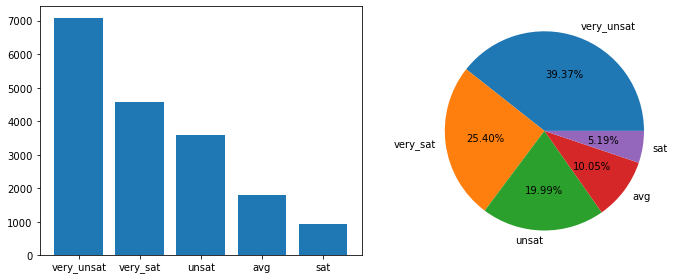

In [12]:
univariate_distribution(mobile, feature, variable_type)

##### 파악한 내용

만족도에서 강한 호불호를 나타낸 사람이 많다.
통신사의 어떤 부분이 선호되는 부분이고, 비선호되는 부분인지 확인지 필요하다.

또한 Very_unsat과 unsat이 도합 60%를 넘어설 정도로 많은데, 특정 사건이 일어난 뒤에 한 만족도 조사인지, 그렇다면 그 사건이 무엇이고 보상 혹은 해결 방안이 무엇인지 확인해야한다.

만약, 특별한 사건이 없었는데 이런 결과가 나온 것이라면 전체적인 서비스 점검이 필요하다..

### 2) COLLEGE

In [13]:
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


변수 유형은  범주 형이고,  대학졸업 여부 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
1    9049
0    8951
Name: COLLEGE, dtype: int64
--------------------------------------------------
1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64
분포
--------------------------------------------------
1    9049
0    8951
Name: COLLEGE, dtype: int64
--------------------------------------------------


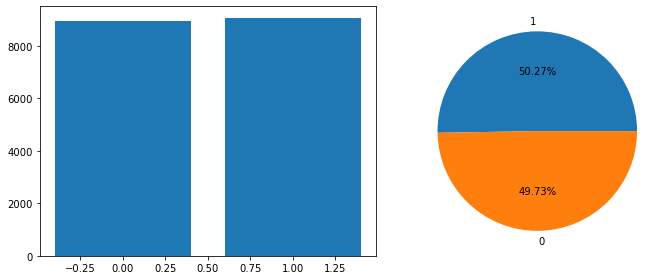

In [14]:
feature = 'COLLEGE'
variable_type = '범주'
meaning = '대학졸업 여부'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type)

##### 파악한 내용

대학 졸업 여부가 약 반반 정도로 매우 유사한 분포를 보이고 있다.

### 3) CONSIDERING_CHANGE_OF_PLAN

변수 유형은  범주 형이고,  변경 계획 설문 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------
considering                 0.396722
actively_looking_into_it    0.247389
no                          0.202444
never_thought               0.100222
perhaps                     0.053222
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: float64
분포
--------------------------------------------------
considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------


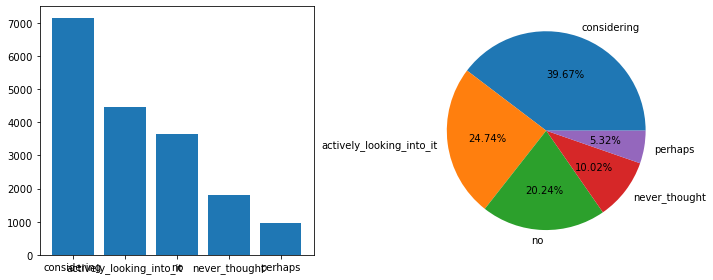

In [15]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'
variable_type = '범주'
meaning = '변경 계획 설문'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type)

##### 파악한 내용

통신사 변경을 고려하거나, 찾는 중이라는 고객이 과반수 이상을 차지하고 있다.

위에서 보았던 만족도 설문과 더불어, 만족도가 낮은 사람들이 변경을 고려 중인지 확인해보는 것이 필요하다.

### 4) INCOME

변수 유형은  숫자 형이고,  연 수입액(달러) 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64
중앙값:  75501.5 
최빈값:  0    28798
1    57467
dtype: int64
분포
--------------------------------------------------
빈도수 :  [1892. 1909. 1827. 1239. 1089. 1112. 1132. 1064. 1045.  930.  944.  944.
  933.  923. 1017.]
구간값 :  [ 20007.          29338.73333333  38670.46666667  48002.2
  57333.93333333  66665.66666667  75997.4         85329.13333333
  94660.86666667 103992.6        113324.33333333 122656.06666667
 131987.8        141319.53333333 150651.26666667 159983.        ]


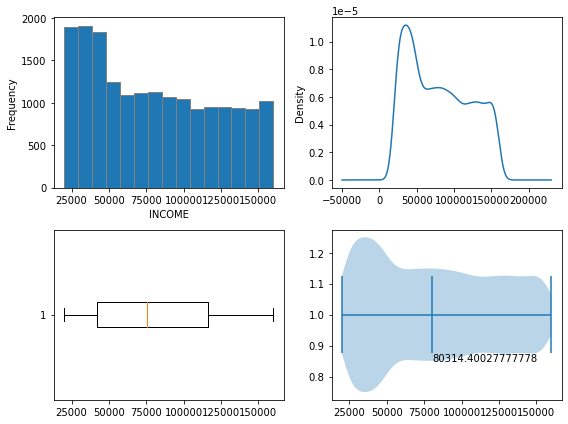

In [16]:
feature = 'INCOME'
variable_type = '숫자'
meaning = '연 수입액(달러)'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type, bins=15)

##### 파악한 내용

약 50000달러를 기준으로 그 이하인 사람들의 빈도가 높다.
이는 통신사 국가 임금분포와의 비교가 필요한 부분이라고 생각된다.
아마 국가 내의 임금 분포가 이런 식이지는 않을까?

### 5) OVERAGE

변수 유형은  숫자 형이고,  월 초과사용 시간(분) 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64
중앙값:  59.0 
최빈값:  0    0
dtype: int64
분포
--------------------------------------------------
빈도수 :  [6.143e+03 7.200e+02 3.101e+03 1.826e+03 2.000e+02 7.400e+01 3.800e+02
 9.640e+02 1.678e+03 1.592e+03 9.610e+02 3.000e+02 5.600e+01 4.000e+00
 1.000e+00]
구간값 :  [ -2.          20.46666667  42.93333333  65.4         87.86666667
 110.33333333 132.8        155.26666667 177.73333333 200.2
 222.66666667 245.13333333 267.6        290.06666667 312.53333333
 335.        ]


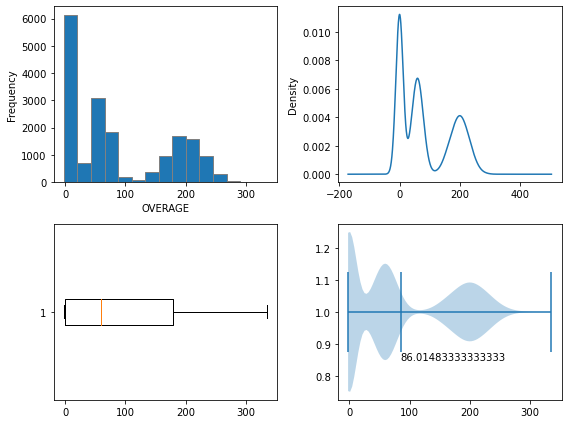

In [17]:
feature = 'OVERAGE'
variable_type = '숫자'
meaning = '월 초과사용 시간(분)'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type, bins=15)

##### 파악한 내용

0에 가까운 초과사용시간을 가진 고객들이 눈에 띄게 많으며, 이 고객들은 어떤 이탈 분포를 가지고 있는지 확인해보면 좋을 것 같다.

### 6) HANDSET_PRICE

변수 유형은  숫자 형이고,  핸드폰 가격(달러) 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64
중앙값:  326.0 
최빈값:  0    209
dtype: int64
분포
--------------------------------------------------
빈도수 :  [3851. 3465. 3036. 1983.  911.  939.  959. 1002.  916.  938.]
구간값 :  [130.  206.9 283.8 360.7 437.6 514.5 591.4 668.3 745.2 822.1 899. ]


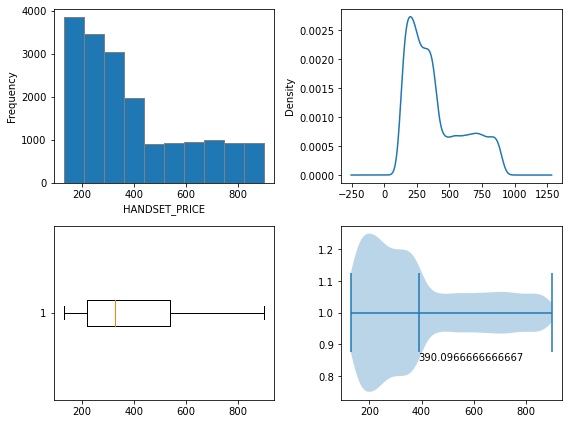

In [18]:
feature = 'HANDSET_PRICE'
variable_type = '숫자'
meaning = '핸드폰 가격(달러)'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type)

##### 파악한 내용

약 400달러를 기준으로 이하인 고객이 많으며, 이상인 고객들이 적다. 
400달러 정도를 기준으로 프리미엄폰 가격이 형성되는 것으로 추정된다. 확인이 필요하다.

### 7) CHURN(target)

변수 유형은  범주 형이고,  이탈여부 입니다.
전처리
--------------------------------------------------
기초통계량
--------------------------------------------------
0    9131
1    8869
Name: CHURN, dtype: int64
--------------------------------------------------
0    0.507278
1    0.492722
Name: CHURN, dtype: float64
분포
--------------------------------------------------
0    9131
1    8869
Name: CHURN, dtype: int64
--------------------------------------------------


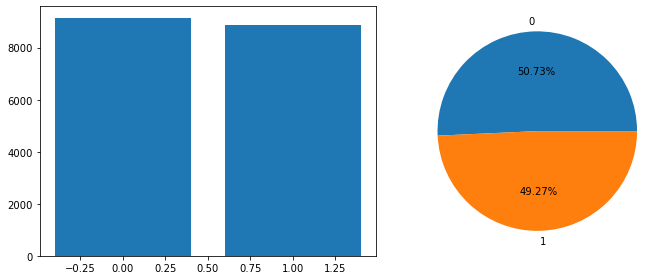

In [19]:
feature = 'CHURN'
variable_type = '범주'
meaning = '이탈여부'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)

univariate_stats(mobile, feature, variable_type)

univariate_distribution(mobile, feature, variable_type)

##### 파악한 내용

이탈여부가 반반에 가까우며, 이탈고객이 약 1% 정도 적다.
이탈 고객과 잔류 고객의 만족도 차이를 보면 좋을 것 같다.

### 8) 추가1

### 9) 추가2

### 10) 추가3

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [20]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [21]:
def cat2cat_crosstab(data, target, feature):
    print(pd.crosstab(data[target], data[feature]))
    print('-'*50)
    print(pd.crosstab(data[target], data[feature], normalize = 'columns'))
    print('-'*50)
    print(pd.crosstab(data[target], data[feature], normalize = 'index'))
    print('-'*50)
    print(pd.crosstab(data[target], data[feature], normalize = 'all'))
    print('='*100)

In [22]:
def cat2cat_visualization(data, target, feature):
    temp = pd.crosstab(data[feature], data[target], normalize = 'index')
    print(temp)

    temp.plot.bar(stacked=True)
    plt.axhline(1-data[target].mean(), color = 'r')
    plt.tight_layout()
    plt.show()
    mosaic(data.sort_values([feature, target]), [feature, target], gap = 0.01)
    plt.axhline(1- data[target].mean(), color = 'r')
    plt.tight_layout()
    plt.show()
    print('='*100)

In [23]:
def cat2cat_stats(data, target, feature):
    # 먼저 집계
    table = pd.crosstab(data[feature], data[target])
    print('교차표\n', table)
    print('-' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    print('기대빈도\n',result[3])

#### 1) REPORTED_SATISFACTION --> CHURN

REPORTED_SATISFACTION  avg  sat  unsat  very_sat  very_unsat
CHURN                                                       
0                      952  492   1792      2334        3543
1                      854  440   1798      2228        3529
--------------------------------------------------
REPORTED_SATISFACTION       avg       sat     unsat  very_sat  very_unsat
CHURN                                                                    
0                      0.527132  0.527897  0.499164  0.511618     0.50099
1                      0.472868  0.472103  0.500836  0.488382     0.49901
--------------------------------------------------
REPORTED_SATISFACTION       avg       sat     unsat  very_sat  very_unsat
CHURN                                                                    
0                      0.104466  0.053989  0.196642  0.256118    0.388785
1                      0.096508  0.049723  0.203187  0.251780    0.398802
--------------------------------------------------
REPORTED_SA

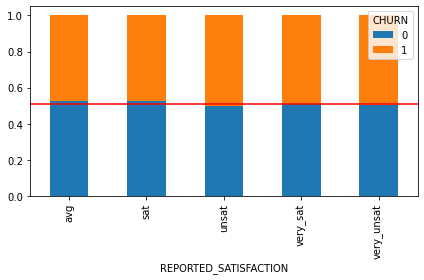

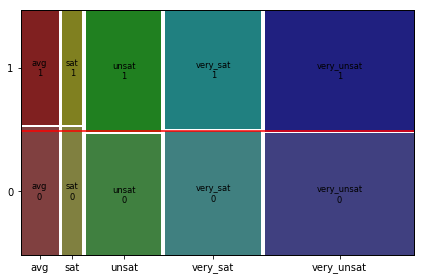

교차표
 CHURN                     0     1
REPORTED_SATISFACTION            
avg                     952   854
sat                     492   440
unsat                  1792  1798
very_sat               2334  2228
very_unsat             3543  3529
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.841100957205645
p-value 0.14452738878905058
자유도 4
기대빈도
 [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


In [24]:
target = 'CHURN'
feature = 'REPORTED_SATISFACTION'

cat2cat_crosstab(mobile, target, feature)
cat2cat_visualization(mobile, target, feature)
cat2cat_stats(mobile, target, feature)

>##### 파악한 내용(없음)

그래프와 카이제곱 통계량을 보았을 때, 유의하지 않은 변수로 보인다.
만족도와 이탈은 상관이 없는걸까? 

만약, 만족도설문의 시점과 이탈 시점이 동일하다면 만족도보다는 다른 요소들의 영향을 크게 받았을 것이며 시점이 상이하다면 이탈 시점에 만족도가 달라졌을 수도 있다고 고려된다.

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                               2278         3648   
1                                               2175         3493   

CONSIDERING_CHANGE_OF_PLAN  never_thought    no  perhaps  
CHURN                                                     
0                                     926  1823      456  
1                                     878  1821      502  
--------------------------------------------------
CONSIDERING_CHANGE_OF_PLAN  actively_looking_into_it  considering  \
CHURN                                                               
0                                           0.511565     0.510853   
1                                           0.488435     0.489147   

CONSIDERING_CHANGE_OF_PLAN  never_thought        no   perhaps  
CHURN                                                          
0                              

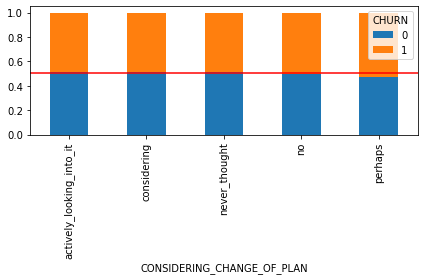

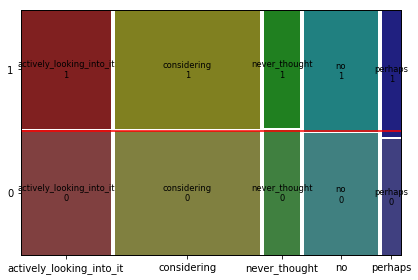

교차표
 CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
actively_looking_into_it    2278  2175
considering                 3648  3493
never_thought                926   878
no                          1823  1821
perhaps                      456   502
----------------------------------------------------------------------------------------------------
카이제곱통계량 5.421434419620688
p-value 0.24672225866799702
자유도 4
기대빈도
 [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


In [25]:
target = 'CHURN'
feature = 'CONSIDERING_CHANGE_OF_PLAN'

cat2cat_crosstab(mobile, target, feature)
cat2cat_visualization(mobile, target, feature)
cat2cat_stats(mobile, target, feature)

>##### 파악한 내용(없음)

변경을 고려 중이라고 하였는데 이탈과 잔류가 유사하게 나타났다.

특히 주목해야 할 부분은 actively_looking_into_it의 잔류율이 생각보다 높다는 점인데, 이 경우 핸드폰과 통신사를 선택할 때 신중하게 고민하기 때문에 아직 나가지 않았지만 나갈 예정인 것으로 받아들일 수도 있을 것으로 보인다.
actively_looking_into_it의 만족도 설문 분포를 확인하는 것이 좋을 것 같다.

perhaps의 경우 유일하게 이탈이 잔류보다 높은데, 이는 중간 정도를 선택하는 심리인 사람들이 많아서 그런 것으로 보인다. (이 통신사, 저 통신사 다 괜찮고.. 나갈 것 같긴 하니 적당한 통신사를 찾아간 것)

>##### 추가분석

변수 유형은  범주 형이고,  매우 불만족인 사람의 변경 계획 입니다.
전처리
--------------------------------------------------
분포
--------------------------------------------------
considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------


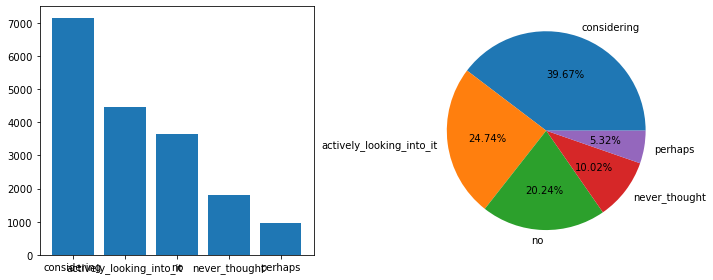

전처리
--------------------------------------------------
분포
--------------------------------------------------
considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64
--------------------------------------------------


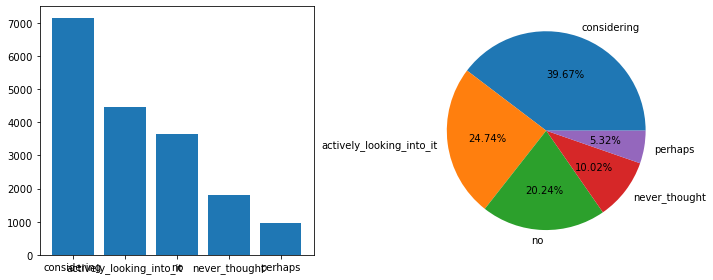

In [26]:
data = mobile[mobile['REPORTED_SATISFACTION'] == 'very_unsat']
feature = 'CONSIDERING_CHANGE_OF_PLAN'
variable_type = '범주'
meaning = '매우 불만족인 사람의 변경 계획'

univariate_meaning(variable_type, meaning)

pre_mobile, pre_feature = univariate_preprocessing(mobile, feature, variable_type)
univariate_distribution(mobile, feature, variable_type)

pre_mobile, pre_feature = univariate_preprocessing(data, feature, variable_type)
univariate_distribution(pre_mobile, feature, variable_type)

#### 3) COLLEGE --> CHURN

COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
--------------------------------------------------
COLLEGE         0        1
CHURN                     
0        0.515697  0.49895
1        0.484303  0.50105
--------------------------------------------------
COLLEGE         0         1
CHURN                      
0        0.505531  0.494469
1        0.488781  0.511219
--------------------------------------------------
COLLEGE         0         1
CHURN                      
0        0.256444  0.250833
1        0.240833  0.251889
CHURN           0         1
COLLEGE                    
0        0.515697  0.484303
1        0.498950  0.501050


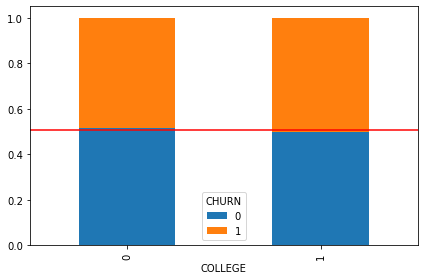

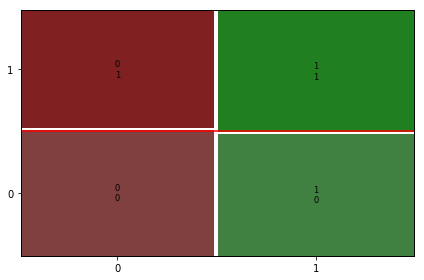

교차표
 CHURN       0     1
COLLEGE            
0        4616  4335
1        4515  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693502
p-value 0.02561083347822053
자유도 1
기대빈도
 [[4540.64338889 4410.35661111]
 [4590.35661111 4458.64338889]]


In [27]:
target = 'CHURN'
feature = 'COLLEGE'

cat2cat_crosstab(mobile, target, feature)
cat2cat_visualization(mobile, target, feature)
cat2cat_stats(mobile, target, feature)

>##### 파악한 내용(약)

연령대와 관련이 있을까? 데이터에 연령대가 없어서 확인할 수는 없지만 아주 어리거나 아주 나이가 많은 사람일 경우, 대학을 졸업하지 않은 사람들이 많을 확률이 높으며 핸드폰과 통신사를 자주 교체하지 않을 확률이 높을 것으로 보인다.

p-value < .05로 유의하게 나왔지만 실제로 관계가 높아보이지는 않는다.

아마 대학졸업 여부를 제외한 다른 연관 요소 (ex. 나이, 연 수입액) 등의 영향이 있을 것으로 보이는데, 사회생활이 활발한 사람의 경우 통신사/핸드폰을 자주 변경할 가능성이 높기 때문이다.

#### 4) feature --> CHURN

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

In [28]:
def num2cat_visualization(data, target, feature, bins=10):
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 4, 1)
    sns.histplot(x=feature, data = data, hue = target)

    plt.subplot(1, 4, 2)
    sns.kdeplot(x=feature, data = data, hue = target, common_norm = False)

    plt.subplot(1, 4, 3)
    sns.kdeplot(x=feature, data = data, hue = target
                , multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')

    plt.subplot(1, 4, 4)
    sns.histplot(x=feature, data = data, bins = bins, hue = target, multiple = 'fill')
    plt.axhline(data[target].mean(), color = 'r')
    plt.suptitle(feature+' Title', fontsize=20)
    plt.tight_layout()
    plt.show()
#     print('='*50)

In [29]:
def num2cat_stats(data, target, feature):
    # 로지스틱 모형을 만들고 통계량을 구해 봅시다.
    print(feature, ' 로지스틱 통계량')
    temp = data.loc[data[feature].notnull()]
    model = sm.Logit(temp[target], temp[feature])
    result = model.fit()
#     print(result.summary())
    print(result.pvalues)

#### 1) HANDSET_PRICE --> CHURN


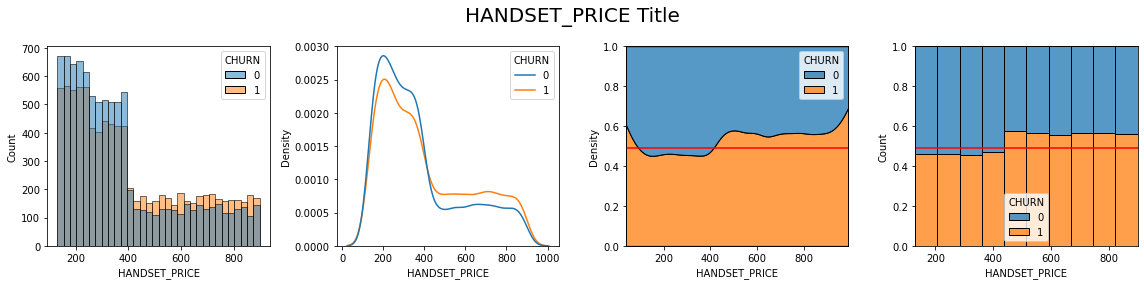

HANDSET_PRICE  로지스틱 통계량
Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


In [30]:
target = 'CHURN'
feature = 'HANDSET_PRICE'
bins = 10
num2cat_visualization(mobile, target, feature, bins)

num2cat_stats(mobile, target, feature,)

>##### 파악한 내용 (중간)

통신사를 이동함에 있어 영향을 받는 것 중 하나는 핸드폰이다.

분석 결과, 크게 핸드폰 가격이 낮은 그룹(약 400달러 기준)과 높은 그룹(약 400달러 이상)으로 나누어져서 낮은 그룹은 잔류가 많고, 높은 그룹은 이탈이 많이 나타난다.
- 중간 관계 정도로 보이지만, 그룹을 나누어 분석할 경우 강한 상관 관계를 보일 것 같다.

이는 보통 핸드폰(특히, 최신형)에 대한 관심이 많은 사람들이 최근에 나온 가격이 높은 핸드폰을 구매하는 경향이 크기 때문으로 보인다.
최신 핸드폰의 경우, 통신사에서 번호이동 시 혜택이 많거나 할인 폭이 큰 경우가 있기 때문에 통신사를 자주 옮기며 핸드폰을 구입하는 사람들이 많다.
또한 최신 핸드폰을 구매하는 사람들은 빠르고 새로운 정보를 기반으로 빠르게 행동하기 때문에 이에 따른 이동이 상대적으로 크게 나타난다.

핸드폰에 대한 기본 기능만을 필요로 하는 사람들은 값싸고 익숙한 핸드폰을 사용하는 것을 선호하는 경향이 있다.
그렇기 때문에 핸드폰이 고장나거나 기능이 크게 저하되지 않는다면 핸드폰을 바꿀 필요성을 느끼지 못하며, 통신사 이동에 대한 필요성도 굳이 느끼지 못해 사용하던 대로 유지하는 경향이 크다.

>##### 추가분석(그룹핑)

In [31]:
import math
mobile['HP_group'] = pd.cut(mobile['HANDSET_PRICE'], bins=[0, 400, math.inf], labels=['low', 'high'])

HP_group   low  high
CHURN               
0         6470  2661
1         5429  3440
--------------------------------------------------
HP_group       low      high
CHURN                       
0         0.543743  0.436158
1         0.456257  0.563842
--------------------------------------------------
HP_group       low      high
CHURN                       
0         0.708575  0.291425
1         0.612132  0.387868
--------------------------------------------------
HP_group       low      high
CHURN                       
0         0.359444  0.147833
1         0.301611  0.191111
CHURN            0         1
HP_group                    
low       0.543743  0.456257
high      0.436158  0.563842


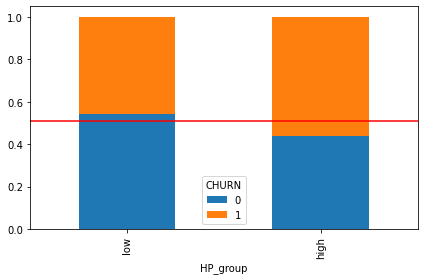

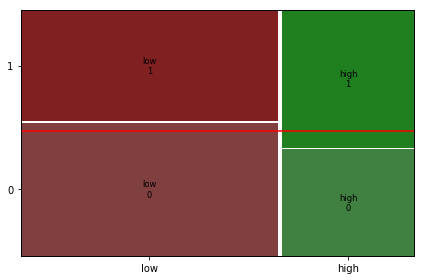

교차표
 CHURN        0     1
HP_group            
low       6470  5429
high      2661  3440
----------------------------------------------------------------------------------------------------
카이제곱통계량 186.3349381793259
p-value 2.0062033420842426e-42
자유도 1
기대빈도
 [[6036.09827778 5862.90172222]
 [3094.90172222 3006.09827778]]


In [32]:
target = 'CHURN'
feature = 'HP_group'

cat2cat_crosstab(mobile, target, feature)
cat2cat_visualization(mobile, target, feature)
cat2cat_stats(mobile, target, feature)

프리미엄 핸드폰으로 추정되는 가격 구간을 기준으로 그룹을 나누었더니, 차이가 더 커 보임.

#### 2) OVERAGE --> CHURN


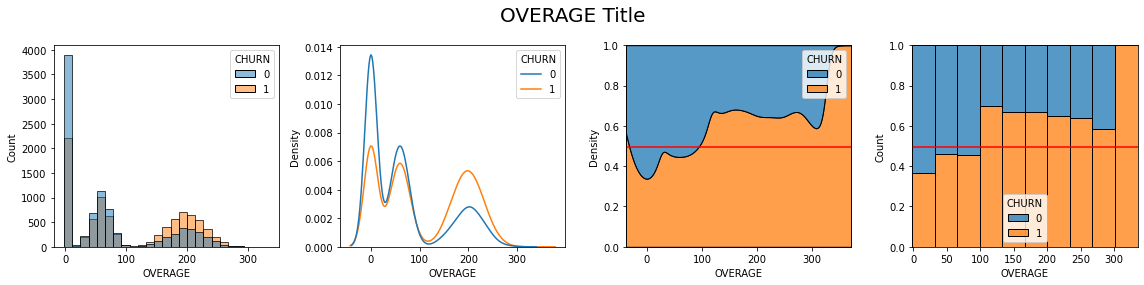

OVERAGE  로지스틱 통계량
Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


In [33]:
target = 'CHURN'
feature = 'OVERAGE'
bins = 10
num2cat_visualization(mobile, target, feature, bins)

num2cat_stats(mobile, target, feature,)

>##### 파악한 내용(강)

0에 가까운 추가 사용량을 가진 고객일 수록 잔류할 가능성이 높다.

핸드폰을 자주 사용하지 않는 다는 얘기이며, 이에 따라 핸드폰의 기본 기능, 권장에 따라 통신사를 변경할 확률이 높은 것으로 보인다.

반면에 100을 넘어가는 고객의 경우에는 이탈률이 높은데, 과금으로 인한 불만족일 수도 있다. 고객의 핸드폰 사용량에 따른 요금제 추천을 고려해보자.

In [34]:
mobile_OVER = mobile[mobile['OVERAGE'] < 20]

In [35]:
mobile_OVER.size

67529

#### 3) INCOME --> CHURN


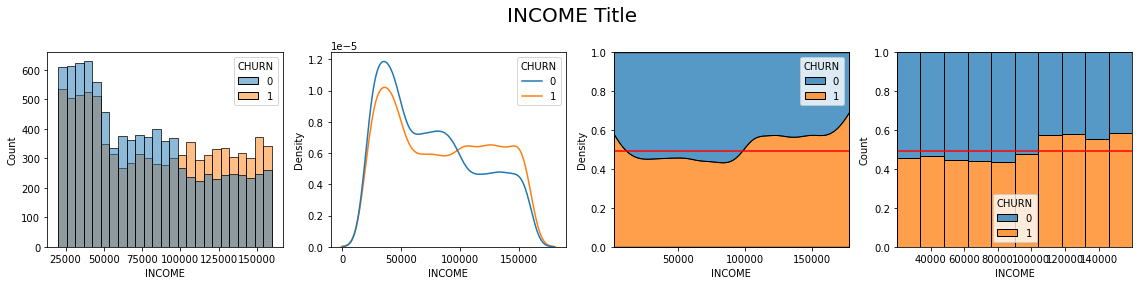

INCOME  로지스틱 통계량
Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


In [36]:
target = 'CHURN'
feature = 'INCOME'
bins = 10
num2cat_visualization(mobile, target, feature, bins)

num2cat_stats(mobile, target, feature,)

>##### 파악한 내용(강)

연 수입액이 높을 수록 이탈률이 높다.

수입액이 높을 수록 높은 요금제를 사용할 것 같은데, 아니라면 초과 사용량이 있는게 아닐까? 확인해보면 좋을 것 같다. 

또한 그룹화했을 경우에 더 높은 상관을 보일 것 같다.

#### 4) AVERAGE_CALL_DURATION --> CHURN


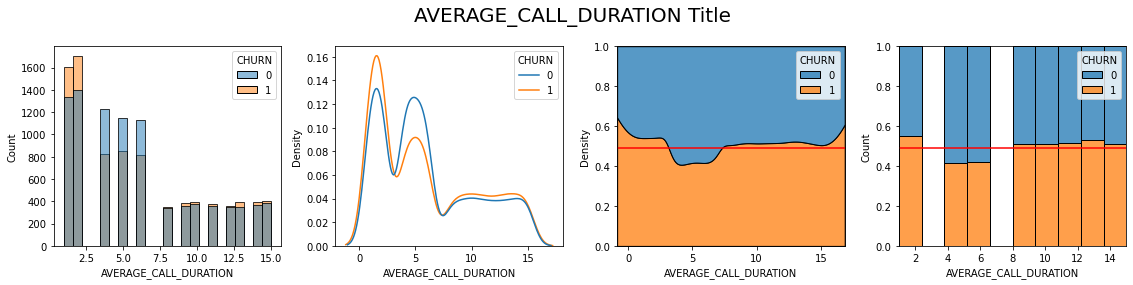

AVERAGE_CALL_DURATION  로지스틱 통계량
Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


In [37]:
target = 'CHURN'
feature = 'AVERAGE_CALL_DURATION'
bins = 10
num2cat_visualization(mobile, target, feature, bins)

num2cat_stats(mobile, target, feature,)

2.5를 기준으로 나뉜다.

2.5보다 낮을 경우, 이탈률이 높다. 
전화보다 다른 기능 사용이 많은 것이 아닌지 확인해 볼 필요가 있다.

## 4.관계 정리

### 1) 강한관계의 변수

OVERAGE, INCOME, HANDSET_PRICE

### 2) 약한관계의 변수

AVERAGE_CALL_DURATION, COLLEGE

### 3) 관계 없음

PREPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석